In [1]:
import pandas as pd
import matplotlib as plt
from matplotlib import pyplot as plt
from scipy.stats import linregress
import numpy as np
import requests
import gmaps

from config import api_key
# Census & gmaps API Keys
from config1 import (api_key, gkey)


# Configure gmaps
gmaps.configure(api_key=gkey)

In [2]:
# Import 2015 Happinese data and get the columns for data anaysis
happiness_data2015=pd.read_csv("Resources/happiness/2015.csv")
happiness_data2015_df = happiness_data2015[["Country","Happiness Score","Happiness Rank","Health (Life Expectancy)"]]

In [3]:
# Get the lat and lng from google map api to form overview of countries distribution
countries=happiness_data2015_df["Country"].tolist()

lat=[]
lng=[]
shortname=[]
i=1
for country in countries:
        target_url = ('https://maps.googleapis.com/maps/api/geocode/json?''address={0}&key={1}').format(country, gkey)
        response = requests.get(target_url).json()
        print("Processing Record " + str(i) + " of Set 1 | " + country)
        shortname.append(response['results'][0]['address_components'][0]['short_name'])
        lat.append(response['results'][0]['geometry']['location']["lat"])
        lng.append(response['results'][0]['geometry']['location']["lng"])
        i=i+1

Processing Record 1 of Set 1 | Switzerland
Processing Record 2 of Set 1 | Iceland
Processing Record 3 of Set 1 | Denmark
Processing Record 4 of Set 1 | Norway
Processing Record 5 of Set 1 | Canada
Processing Record 6 of Set 1 | Finland
Processing Record 7 of Set 1 | Netherlands
Processing Record 8 of Set 1 | Sweden
Processing Record 9 of Set 1 | New Zealand
Processing Record 10 of Set 1 | Australia
Processing Record 11 of Set 1 | Israel
Processing Record 12 of Set 1 | Costa Rica
Processing Record 13 of Set 1 | Austria
Processing Record 14 of Set 1 | Mexico
Processing Record 15 of Set 1 | United States
Processing Record 16 of Set 1 | Brazil
Processing Record 17 of Set 1 | Luxembourg
Processing Record 18 of Set 1 | Ireland
Processing Record 19 of Set 1 | Belgium
Processing Record 20 of Set 1 | United Arab Emirates
Processing Record 21 of Set 1 | United Kingdom
Processing Record 22 of Set 1 | Oman
Processing Record 23 of Set 1 | Venezuela
Processing Record 24 of Set 1 | Singapore
Processi

In [4]:
#add lat and lng to the happiness dataframe
happiness_data2015_df["Lat"]=lat
happiness_data2015_df["Lng"]=lng

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [5]:
#import world out of pocket expediture to check country shortname
import json
alldata = requests.get("https://restcountries.eu/rest/v2/all").json()
country_name=[]
country_code=[]
shortcode3digit=[]
################################################
#create a lookup dictionary for country symbol#
###############################################
for countrydic in alldata:
    country_name.append(countrydic['name'])
    country_code.append(countrydic['alpha3Code'])

countrylookupdic = {}
for i in range(len(country_name)):
    countrylookupdic[country_name[i]] = country_code[i]
    
# manually add missing country names
countrylookupdic['United States'] = 'USA'
countrylookupdic['United Kingdom'] = 'GBR'
countrylookupdic['Venezuela']='VEN'
countrylookupdic['South Korea']='KOR'
countrylookupdic['Bolivia']='BOL'
countrylookupdic['Moldova']='MDA'
countrylookupdic['Russia']='RUS'
countrylookupdic['North Cyprus']='CYP'
countrylookupdic['Kosovo']='SCG'
countrylookupdic['Vietnam']='VNM'
countrylookupdic['Somaliland region']='SOM'
countrylookupdic['Macedonia']='MKD'
countrylookupdic['Laos']='LAO'
countrylookupdic['Palestinian Territories']='PSE'
countrylookupdic['Iran']='IRN'
countrylookupdic['Iran']='IRN'
countrylookupdic['Congo (Kinshasa)']='NONE'
countrylookupdic['Congo (Brazzaville)']='CON'
countrylookupdic['Tanzania']='TZA'
countrylookupdic['Ivory Coast']='CIV'
countrylookupdic['Syria']='SYR'
#print(countrylookupdic)
#print(countrylookupdic['Cabo Verde'])

##################
# check missing country names
##################
for country in countries:
    shortname = countrylookupdic.get(country)
    shortcode3digit.append(shortname)
    if shortname == None:
        print(shortname)

In [6]:
# Add the country code to the dataframe and save the csv file for the group
happiness_data2015_df["Country Code"]=shortcode3digit
happiness_data2015_df.to_csv("Resources/happiness/happiness_ranking2015")

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [7]:
# select top 50 happiness country and store top50 maker location for lat, lng
top50=happiness_data2015_df.loc[happiness_data2015_df["Happiness Rank"]<51]
top50_marker_locations =top50[["Lat","Lng"]]
top50_countries=top50["Country"]
top50.head()

,Country,Happiness Score,Happiness Rank,Health (Life Expectancy),Lat,Lng,Country Code
0,Switzerland,7.587,1,0.94143,46.818188,8.227512,CHE
1,Iceland,7.561,2,0.94784,64.963051,-19.020835,ISL
2,Denmark,7.527,3,0.87464,56.263920,9.501785,DNK
3,Norway,7.522,4,0.88521,60.472024,8.468946,NOR
4,Canada,7.427,5,0.90563,56.130366,-106.346771,CAN


In [8]:
# Create a map using top50 Happiness country coordinates to set markers
# Create a marker_layer using the top20 country name list to fill the info box
fig1 = gmaps.figure()
markers1 = gmaps.marker_layer(top50_marker_locations,info_box_content=[f"Country: {country}" for country in top50_countries])
fig1.add_layer(markers1)

fig1

Figure(layout=FigureLayout(height='420px'))

In [9]:
# select middle 50 happiness country and store mid 50 maker location for lat, lng
mid50=happiness_data2015_df.loc[(happiness_data2015_df["Happiness Rank"] >=51) & (happiness_data2015_df["Happiness Rank"] < 101)]
mid50_marker_locations = mid50[["Lat","Lng"]]
mid50_countries=mid50["Country"]

In [10]:
# Create a map using mid50 Happiness country coordinates to set markers
# Create a marker_layer using the mid50 country name list to fill the info box
fig2 = gmaps.figure()
markers2 = gmaps.marker_layer(mid50_marker_locations,info_box_content=[f"Country: {country}" for country in mid50_countries])
fig2.add_layer(markers2)
fig2

Figure(layout=FigureLayout(height='420px'))

In [11]:
# select low50 happiness country and store low 50 maker location for lat, lng
low50=happiness_data2015_df.loc[happiness_data2015_df["Happiness Rank"]>=101]
low50_marker_locations =low50[["Lat","Lng"]]
low50_countries=low50["Country"]


In [12]:
# Create a map using low50 Happiness country coordinates to set markers
# Create a marker_layer using the low50 country name list to fill the info box
fig3 = gmaps.figure()
markers3 = gmaps.marker_layer(low50_marker_locations,info_box_content=[f"Country: {country}" for country in low50_countries])
fig3.add_layer(markers3)
fig3

Figure(layout=FigureLayout(height='420px'))

In [13]:
#import world current health expenditure data set from csv file and organized the data for analysis
health_current_expenditure = pd.read_csv("Resources/happiness/current_expenditure_Data.csv")
health_current_expenditure_2015=health_current_expenditure[["Country Name","2015 [YR2015]","Country Code"]]
health_current_expenditure_2015=health_current_expenditure_2015.rename(columns={"2015 [YR2015]":"2015 CHE (%GDP)",
                                                                       "Country Name":"Country"})
#import world domestic govement health expenditure data set from csv file and organized the data for analysis
health_gov_expenditure=pd.read_csv("Resources/happiness/Domestic_Govement_Health_Expenditure Data.csv")
health_gov_expenditure_2015=health_gov_expenditure.loc[:,["Country Name","2015 [YR2015]","Country Code"]]
health_gov_expenditure_2015=health_gov_expenditure_2015.rename(columns={"2015 [YR2015]":"2015 GHE (%GDP)",
                                                                         "Country Name":"Country"})


In [14]:
# Merge CHE and DGHE date to Happiness Ranking data and check for nandata
merge1=happiness_data2015_df.merge(health_current_expenditure_2015,on='Country Code',how="left")
merge2=merge1.merge(health_gov_expenditure_2015,on='Country Code',how="left")

nandata1 = merge2.isnull().sum()
nandata1

Country_x                   0
Happiness Score             0
Happiness Rank              0
Health (Life Expectancy)    0
Lat                         0
Lng                         0
Country Code                0
Country_y                   4
2015 CHE (%GDP)             4
Country                     4
2015 GHE (%GDP)             4
dtype: int64

In [15]:
#show the merge dataframe
merge2.head()

,Country_x,Happiness Score,Happiness Rank,Health (Life Expectancy),Lat,Lng,Country Code,Country_y,2015 CHE (%GDP),Country,2015 GHE (%GDP)
0,Switzerland,7.587,1,0.94143,46.818188,8.227512,CHE,Switzerland,12.05701692,Switzerland,70.72655713
1,Iceland,7.561,2,0.94784,64.963051,-19.020835,ISL,Iceland,8.6091496,Iceland,81.47514535
2,Denmark,7.527,3,0.87464,56.263920,9.501785,DNK,Denmark,10.32620701,Denmark,84.14279942
3,Norway,7.522,4,0.88521,60.472024,8.468946,NOR,Norway,9.97554719,Norway,85.39754712
4,Canada,7.427,5,0.90563,56.130366,-106.346771,CAN,Canada,10.43562237,Canada,73.54982557


In [16]:
# Data Clearup and print head
happinese_ranking_data=merge2[["Country","Country Code","Happiness Score","Happiness Rank","Health (Life Expectancy)",
                               "2015 CHE (%GDP)","2015 GHE (%GDP)"]]

len(happinese_ranking_data)

158

In [17]:
# Get Out of Pocket over Govement Health Expendirure(%) through WHO APIs
oop_url="http://apps.who.int/gho/athena/data/GHO/GHED_OOPSCHE_SHA2011.json?profile=simple&filter=COUNTRY:"
year=";YEAR:2015"

oop_value=[]
oop_country=[]

i=1
for code in shortcode3digit:
    try:
        response_OOP = requests.get(oop_url+code+year).json()
        if response_OOP.get('fact'):
            oop_country.append(response_OOP['fact'][0]['dim']["COUNTRY"])
            oop_value.append(response_OOP['fact'][0]['Value'])
            print("Processing----------"+str(i)+code)
        else:
            oop_country.append("NaN")
            oop_value.append("NaN")
            print("----------------------No DATA")
    except:
        print("---------------------------error")
        oop_country.append("NaN")
        oop_value.append("NaN")
    i=i+1

Processing----------1CHE
Processing----------2ISL
Processing----------3DNK
Processing----------4NOR
Processing----------5CAN
Processing----------6FIN
Processing----------7NLD
Processing----------8SWE
Processing----------9NZL
Processing----------10AUS
Processing----------11ISR
Processing----------12CRI
Processing----------13AUT
Processing----------14MEX
Processing----------15USA
Processing----------16BRA
Processing----------17LUX
Processing----------18IRL
Processing----------19BEL
Processing----------20ARE
Processing----------21GBR
Processing----------22OMN
Processing----------23VEN
Processing----------24SGP
Processing----------25PAN
Processing----------26DEU
Processing----------27CHL
Processing----------28QAT
Processing----------29FRA
Processing----------30ARG
Processing----------31CZE
Processing----------32URY
Processing----------33COL
Processing----------34THA
Processing----------35SAU
Processing----------36ESP
Processing----------37MLT
---------------------------error
Processing----

In [18]:
#Merge oop_data to final dataframe
happinese_ranking_data["OOP/CHE(%)"]=oop_value

happinese_ranking_data.head()

#oop_data=pd.DataFrame({"Country":oop_country,"OOP/CHE(%)":oop_value}) #,"2015 Suicide rate/10k ppl":suicide_value})
#final_health_data=merge2.merge(oop_suicide_data,on='Country',how="left")
#nandata = final_health_data.loc[final_health_data["OOP/CHE(%)"].isnull()]
#print(nandata)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Country,Country Code,Happiness Score,Happiness Rank,Health (Life Expectancy),2015 CHE (%GDP),2015 GHE (%GDP),OOP/CHE(%)
0,Switzerland,CHE,7.587,1,0.94143,12.05701692,70.72655713,28.3
1,Iceland,ISL,7.561,2,0.94784,8.6091496,81.47514535,17.0
2,Denmark,DNK,7.527,3,0.87464,10.32620701,84.14279942,13.7
3,Norway,NOR,7.522,4,0.88521,9.97554719,85.39754712,14.3
4,Canada,CAN,7.427,5,0.90563,10.43562237,73.54982557,14.6


In [19]:
# Get suicide value through WHO APIs
suicide_value=[]
suicide_rate_url="http://apps.who.int/gho/athena/data/GHO/MH_12.json?profile=simple&filter=COUNTRY:"
suicide_year=";YEAR:2015"


suicide_value=[]
suicide_country=[]
oop_countrycode=[]

i=1
for code in shortcode3digit:
    try:
        response_suicide = requests.get(suicide_rate_url+code+suicide_year).json()
        if response_suicide.get('fact'):
            suicide_value.append(response_suicide['fact'][1]['Value'])
            print("Processing----------"+str(i)+code)
        else:
            suicide_value.append("NaN")
            print("----------------------No DATA")
    except:
        print("---------------------------error")
        suicide_value.append("NaN")
    i=i+1

Processing----------1CHE
Processing----------2ISL
Processing----------3DNK
Processing----------4NOR
Processing----------5CAN
Processing----------6FIN
Processing----------7NLD
Processing----------8SWE
Processing----------9NZL
Processing----------10AUS
Processing----------11ISR
Processing----------12CRI
Processing----------13AUT
Processing----------14MEX
Processing----------15USA
Processing----------16BRA
Processing----------17LUX
Processing----------18IRL
Processing----------19BEL
Processing----------20ARE
Processing----------21GBR
Processing----------22OMN
Processing----------23VEN
Processing----------24SGP
Processing----------25PAN
Processing----------26DEU
Processing----------27CHL
Processing----------28QAT
Processing----------29FRA
Processing----------30ARG
Processing----------31CZE
Processing----------32URY
Processing----------33COL
Processing----------34THA
Processing----------35SAU
Processing----------36ESP
Processing----------37MLT
---------------------------error
Processing----

In [20]:
#Add the Suicide Rate to the dataframe
happinese_ranking_data["Suicide Rate"]=suicide_value
happinese_ranking_data.head()
happinese_ranking_data

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Country,Country Code,Happiness Score,Happiness Rank,Health (Life Expectancy),2015 CHE (%GDP),2015 GHE (%GDP),OOP/CHE(%),Suicide Rate
0,Switzerland,CHE,7.587,1,0.94143,12.05701692,70.72655713,28.3,11.4
1,Iceland,ISL,7.561,2,0.94784,8.6091496,81.47514535,17.0,12.9
2,Denmark,DNK,7.527,3,0.87464,10.32620701,84.14279942,13.7,8.6
3,Norway,NOR,7.522,4,0.88521,9.97554719,85.39754712,14.3,10.2
4,Canada,CAN,7.427,5,0.90563,10.43562237,73.54982557,14.6,10.5
5,Finland,FIN,7.406,6,0.88911,9.44569068,77.41248113,19.9,12.4
6,Netherlands,NLD,7.378,7,0.89284,10.6902779,80.71063836,12.3,9.7
7,Sweden,SWE,7.364,8,0.91087,11.01207026,83.66360718,15.2,12.3
8,New Zealand,NZL,7.286,9,0.90837,9.34035114,..,0.0,11.6
9,Australia,AUS,7.284,10,0.93156,9.44533327,..,No data,12.2


In [21]:
#drop na data
happinese_ranking_data=happinese_ranking_data.convert_objects(convert_numeric=True)
happinese_ranking_data=happinese_ranking_data.dropna(axis=0,how="any")
len(happinese_ranking_data)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  


145

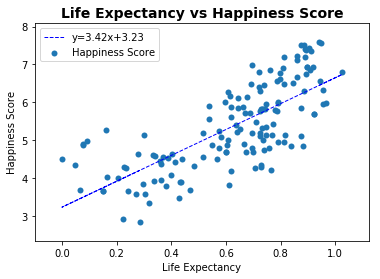

In [22]:
#######################################################################################
##Plotting Scatter figures of Happiness value to the factors and calculate regression##
#######################################################################################

from matplotlib import pyplot as plt
from scipy.stats import linregress

# plot Health (Life Expectancy)
hle=happinese_ranking_data["Health (Life Expectancy)"]
x_axis_hle=hle
# Set line
(slope_hle, intercept_hle, r_hle , p_hle, se_hle) = linregress(x_axis_hle,happinese_ranking_data["Happiness Score"] )
fit_hle= slope_hle * x_axis_hle + intercept_hle


plt.title("Life Expectancy vs Happiness Score", fontsize=14, fontweight="bold")

plt.xlim(min(x_axis_hle-0.1), max(x_axis_hle)+0.1,)
plt.ylim(min(happinese_ranking_data["Happiness Score"]-0.5),max(happinese_ranking_data["Happiness Score"])+0.5)
plt.scatter(x_axis_hle,happinese_ranking_data["Happiness Score"] ,linewidth=0, marker="o")
plt.plot(x_axis_hle, fit_hle,'b--',linewidth=1,label='y={:.2f}x+{:.2f}'.format(slope_hle,intercept_hle))
plt.ylabel("Happiness Score")
plt.xlabel("Life Expectancy")
plt.legend()

plt.show()

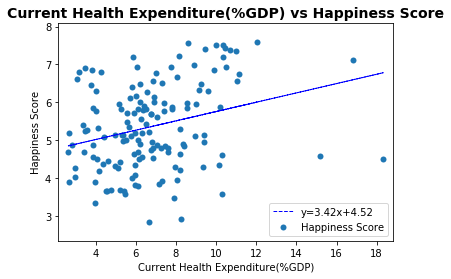

In [23]:
# plot 2015 CHE (%GDP)
che=happinese_ranking_data["2015 CHE (%GDP)"]
x_axis_che=che
(slope_che, intercept_che, r_che , p_che, se_che) = linregress(x_axis_che,happinese_ranking_data["Happiness Score"] )
fit_che= slope_che * x_axis_che+ intercept_che

plt.title("Current Health Expenditure(%GDP) vs Happiness Score", fontsize=14, fontweight="bold")

plt.xlim(min(x_axis_che-0.5), max(x_axis_che)+0.5,)
plt.ylim(min(happinese_ranking_data["Happiness Score"]-0.5),max(happinese_ranking_data["Happiness Score"])+0.5)
plt.scatter(x_axis_che,happinese_ranking_data["Happiness Score"] ,linewidth=0, marker="o")
plt.plot(x_axis_che, fit_che,'b--',linewidth=1,label='y={:.2f}x+{:.2f}'.format(slope_hle,intercept_che))
plt.ylabel("Happiness Score")
plt.xlabel("Current Health Expenditure(%GDP)")
plt.legend()

plt.show()

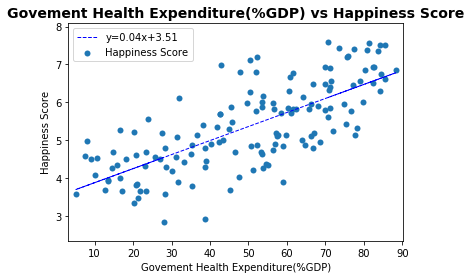

In [24]:
# plot 2015 GHE (%GDP)
ghe=happinese_ranking_data["2015 GHE (%GDP)"]
x_axis_ghe=ghe
(slope_ghe, intercept_ghe, r_ghe , p_ghe, se_ghe) = linregress(x_axis_ghe,happinese_ranking_data["Happiness Score"] )
fit_ghe= slope_ghe * x_axis_ghe+ intercept_ghe

plt.title("Govement Health Expenditure(%GDP) vs Happiness Score", fontsize=14, fontweight="bold")

plt.xlim(min(x_axis_ghe-2), max(x_axis_ghe)+2,)
plt.ylim(min(happinese_ranking_data["Happiness Score"]-0.5),max(happinese_ranking_data["Happiness Score"])+0.5)
plt.scatter(x_axis_ghe,happinese_ranking_data["Happiness Score"] ,linewidth=0, marker="o")
plt.plot(x_axis_ghe, fit_ghe,'b--',linewidth=1,label='y={:.2f}x+{:.2f}'.format(slope_ghe,intercept_ghe))
plt.ylabel("Happiness Score")
plt.xlabel("Govement Health Expenditure(%GDP)")
plt.legend()

plt.show()

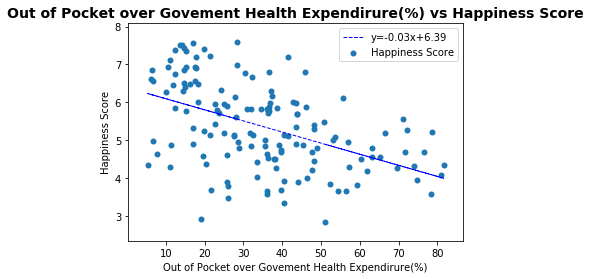

In [25]:
# plot Out of Pocket over Govement Health Expendirure
oop=happinese_ranking_data["OOP/CHE(%)"]
x_axis_oop=oop
(slope_oop, intercept_oop, r_oop , p_oop, se_oop) = linregress(x_axis_oop,happinese_ranking_data["Happiness Score"] )
fit_oop= slope_oop * x_axis_oop + intercept_oop

plt.title("Out of Pocket over Govement Health Expendirure(%) vs Happiness Score", fontsize=14, fontweight="bold")

plt.xlim(min(x_axis_oop)-5, max(x_axis_oop)+5,)
plt.ylim(min(happinese_ranking_data["Happiness Score"]-0.5),max(happinese_ranking_data["Happiness Score"])+0.5)
plt.scatter(x_axis_oop,happinese_ranking_data["Happiness Score"] ,linewidth=0, marker="o")
plt.plot(x_axis_oop, fit_oop,'b--',linewidth=1,label='y={:.2f}x+{:.2f}'.format(slope_oop,intercept_oop))
plt.ylabel("Happiness Score")
plt.xlabel("Out of Pocket over Govement Health Expendirure(%)")
plt.legend()

plt.show()

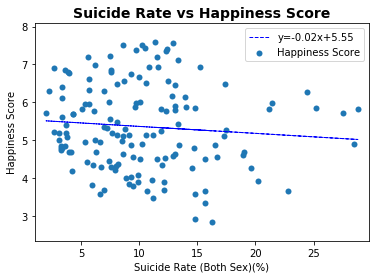

In [27]:
# plot Suicide Rate
sr=happinese_ranking_data["Suicide Rate"]
x_axis_sr=sr
(slope_sr, intercept_sr, r_sr , p_sr, se_sr) = linregress(x_axis_sr,happinese_ranking_data["Happiness Score"] )
fit_sr= slope_sr * x_axis_sr + intercept_sr

plt.title("Suicide Rate vs Happiness Score", fontsize=14, fontweight="bold")

plt.xlim(min(x_axis_sr)-1, max(x_axis_sr)+1,)
plt.ylim(min(happinese_ranking_data["Happiness Score"]-0.5),max(happinese_ranking_data["Happiness Score"])+0.5)
plt.scatter(x_axis_sr,happinese_ranking_data["Happiness Score"] ,linewidth=0, marker="o")
plt.plot(x_axis_sr, fit_sr,'b--',linewidth=1,label='y={:.2f}x+{:.2f}'.format(slope_sr,intercept_sr))
plt.ylabel("Happiness Score")
plt.xlabel("Suicide Rate (Both Sex)(%)")
plt.legend()
plt.savefig("Suicide Rate VS Happiness Score")
plt.show()

In [28]:
# Put Statistic parameters into dataframe
stats_df=pd.DataFrame({"Factors":['Health (Life Expectancy)','Current Health Expenditure(%GDP)', 'Govement Health Expenditure(%GDP)',
                                 'Out of pocket/Govement Expenditure','Suicide Rate'],
                      "R Value":[r_hle,r_che,r_ghe,r_oop,r_sr],
                      "P Value":[p_hle,p_che,p_ghe,p_oop,p_sr],
                      "Standard Error":[se_hle,se_che,se_ghe,se_oop,se_sr]})
stats_df

,Factors,R Value,P Value,Standard Error
0,Health (Life Expectancy),0.736374,4.887253e-26,0.262852
1,Current Health Expenditure(%GDP),0.283969,5.374099e-04,0.034795
2,Govement Health Expenditure(%GDP),0.729708,2.232907e-25,0.002906
3,Out of pocket/Govement Expenditure,-0.483928,6.986104e-10,0.004438
4,Suicide Rate,-0.089894,2.822494e-01,0.017030


In [29]:
# save the final data to csv
happinese_ranking_data.to_csv("Health_happiness")

In [30]:
# calculate the correlation of the factors
happinese_ranking_data.corr()

,Happiness Score,Happiness Rank,Health (Life Expectancy),2015 CHE (%GDP),2015 GHE (%GDP),OOP/CHE(%),Suicide Rate
Happiness Score,1.000000,-0.992378,0.736374,0.283969,0.729708,-0.483928,-0.089894
Happiness Rank,-0.992378,1.000000,-0.740273,-0.259830,-0.742160,0.487979,0.080011
Health (Life Expectancy),0.736374,-0.740273,1.000000,0.199018,0.694642,-0.253171,-0.269250
2015 CHE (%GDP),0.283969,-0.259830,0.199018,1.000000,0.130567,-0.261606,0.126830
2015 GHE (%GDP),0.729708,-0.742160,0.694642,0.130567,1.000000,-0.715606,-0.023534
OOP/CHE(%),-0.483928,0.487979,-0.253171,-0.261606,-0.715606,1.000000,-0.144802
Suicide Rate,-0.089894,0.080011,-0.269250,0.126830,-0.023534,-0.144802,1.000000


In [31]:
#combining the data with strong facors of the other fields 
tech_file=pd.read_csv("Resources/tech_dataframe.csv")
econ_file=pd.read_csv("Resources/happiness_finance.csv")
pop_file=pd.read_csv("Resources/happinese_pop.csv")
terr_file=pd.read_csv("Resources/all_tertiary.csv")

final_merge1=tech_file.merge(pop_file, on="Country Code", how = "left")
final_merge2=final_merge1.merge(happinese_ranking_data, on="Country Code", how ='left')
final_merge2=final_merge2.rename(columns={"Country_x":"Country"})
final_merge3=final_merge2.merge(econ_file,on="Country",how = 'left')
factor_training_df=final_merge3[["Country","Happiness Score_x","Country Code","2015 GHE (%GDP)","% of Internet Users","Rural Population 2015(%Total)","GDP per Capita (PPP)"]]
factor_training_df=factor_training_df.rename(columns={"Happiness Score_x":"Happiness Score"})
factor_training_df.head()

,Country,Happiness Score,Country Code,2015 GHE (%GDP),% of Internet Users,Rural Population 2015(%Total),GDP per Capita (PPP)
0,Switzerland,7.587,CHE,70.726557,87.48,26.282,46.43
1,Iceland,7.561,ISL,81.475145,98.20,6.3,41.00
2,Denmark,7.527,DNK,84.142799,96.33,12.474,37.90
3,Norway,7.522,NOR,85.397547,96.81,18.909,54.95
4,Canada,7.427,CAN,73.549826,88.47,18.741,43.47


In [32]:
#combining data with Education field
factor_training_terr_df=factor_training_df.merge(terr_file, on="Country",how="left")
factor_training_terr_df.head()

,Country,Happiness Score_x,Country Code,2015 GHE (%GDP),% of Internet Users,Rural Population 2015(%Total),GDP per Capita (PPP),Unnamed: 0,Happiness Score_y,Happiness Rank,2015
0,Switzerland,7.587,CHE,70.726557,87.48,26.282,46.43,0,7.587,1,57.51696
1,Iceland,7.561,ISL,81.475145,98.20,6.3,41.00,1,7.561,2,75.76606
2,Denmark,7.527,DNK,84.142799,96.33,12.474,37.90,2,7.527,3,82.13379
3,Norway,7.522,NOR,85.397547,96.81,18.909,54.95,3,7.522,4,77.95804
4,Canada,7.427,CAN,73.549826,88.47,18.741,43.47,4,7.427,5,65.28307


In [39]:
factor_training_df1=factor_training_terr_df.rename(columns={"2015":"School Enrollment",
                                                            "Happiness Score_x":"Happiness Score"})
factor_training_df1.head()

,Country,Happiness Score,Country Code,2015 GHE (%GDP),% of Internet Users,Rural Population 2015(%Total),GDP per Capita (PPP),Unnamed: 0,Happiness Score_y,Happiness Rank,School Enrollment
0,Switzerland,7.587,CHE,70.726557,87.48,26.282,46.43,0,7.587,1,57.51696
1,Iceland,7.561,ISL,81.475145,98.20,6.3,41.00,1,7.561,2,75.76606
2,Denmark,7.527,DNK,84.142799,96.33,12.474,37.90,2,7.527,3,82.13379
3,Norway,7.522,NOR,85.397547,96.81,18.909,54.95,3,7.522,4,77.95804
4,Canada,7.427,CAN,73.549826,88.47,18.741,43.47,4,7.427,5,65.28307


In [41]:
factor_training_df2=factor_training_df1[["Country","Happiness Score","Country Code","% of Internet Users","Rural Population 2015(%Total)","GDP per Capita (PPP)","2015 GHE (%GDP)","School Enrollment"]]
factor_training_df2.head()

,Country,Happiness Score,Country Code,% of Internet Users,Rural Population 2015(%Total),GDP per Capita (PPP),2015 GHE (%GDP),School Enrollment
0,Switzerland,7.587,CHE,87.48,26.282,46.43,70.726557,57.51696
1,Iceland,7.561,ISL,98.20,6.3,41.00,81.475145,75.76606
2,Denmark,7.527,DNK,96.33,12.474,37.90,84.142799,82.13379
3,Norway,7.522,NOR,96.81,18.909,54.95,85.397547,77.95804
4,Canada,7.427,CAN,88.47,18.741,43.47,73.549826,65.28307


In [ ]:
#factor_training_df2=factor_training_df1[["Country","Happiness Score","Country Code","% of Internet Users","Rural Population 2015(%Total)","GDP per Capita (PPP)","2015 GHE (%GDP)","School Enrollment"]]

In [42]:
#Print out the lenth of the data after final combine
factor_training_df2=factor_training_df2.dropna(how="any")
print(len(factor_training_df2))


91


In [43]:
#############################################
##Buiding multiple linear regression model##
############################################
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.formula.api import ols
import statsmodels.api as sm
x = factor_training_df2[["% of Internet Users","Rural Population 2015(%Total)","GDP per Capita (PPP)","2015 GHE (%GDP)","School Enrollment"]].values
x=x.astype(np.float)
y= factor_training_df2['Happiness Score'].values
y= y.astype(np.float)
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(x, y)
         
         
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)
#print("Happiness Predition Formula is y=0.01170313X)

#New_internet_user = 52.2
#New_rural_Population= 19.89
#New_GDP_per_Capita=8.1
#New_GHE =6.2
#New_enrollment = 0.63
#print ('Predicted Happiness Score: \n', regr.predict([[New_internet_user ,New_rural_Population,New_GDP_per_Capita,New_GHE,New_enrollment]]))

# with statsmodels
x = sm.add_constant(x) # adding a constant
 
model = sm.OLS(y, x).fit()
#predictions = model.predict(x) 
 
print_model = model.summary()
print(print_model)

Intercept: 
 4.014707724083737
Coefficients: 
 [ 0.01219155 -0.00696146  0.0116135   0.01491939  0.00304443]
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.689
Model:                            OLS   Adj. R-squared:                  0.670
Method:                 Least Squares   F-statistic:                     37.58
Date:                Sat, 06 Apr 2019   Prob (F-statistic):           3.74e-20
Time:                        00:12:54   Log-Likelihood:                -89.592
No. Observations:                  91   AIC:                             191.2
Df Residuals:                      85   BIC:                             206.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------

In [46]:
# Testing with 2014 data with new model

New_ppp1=[62.548,97.199,86.605,59.180,50.633,49.914,51.704,52.855,62.327,10.631,12.787,10.580,54.696,55.412,47.351,46.783,20.469,
         10.026,43.008,48.043,86.853,14.794,12.245,24.575,27.401,7.913,5.954,16.738,29.623,19.745]
New_rural_Pop1=[12.59,19.31,26.30,10.31,13.75,18.78,14.83,42.47,6.33,42.474,24.059,33.629,21.007,18.517,37.66,2.167,17.635,19.855,14.508,
              20.606,22.81,1.132,12.697,8.623,17.04,32.969,20.585,53.057,5.055,20.634,26.616]
New_internet_user1=[96.0,96.3,87,92.5,87.1,92.4,81,98.2,84.6,49.4,44.9,44.4,87.4,79.7,85,91.6,70.2,57.6,83.8,86.2,91.5,72.4,64.7,63.7,69.3,52.6,34.9,17.7,76.2,79.7]
New_GHE1=[84.01340764,85.28893689,70.7952987,83.36624002,73.56960053,77.76613216,75.48624911,81.04018559,67.35788828,73.97301542,61.13153125,
         51.79225149,49.98499281,69.30107616,81.81960471,80.3156511,78.77400559,43.98666051,78.78767526,84.2689396,86.74301674,60.35286295,
         70.37210032,73.4250111,43.75467665,70.95424042,70.95424042,77.47099124,70.01414925,82.68672651]
New_enrollment1=[81.03,77.55,57.03,94.85,62.18,66.00,88.88,78.97,81.44,95.00,53.04,44.52,30.23,88.63,73.81,73.00,57.00,35.00,50.00,62.00,
                64.00,13.00,86.00,83.00,57.96,53.10,53.28,50.17,60.65,88.88,65.59]

score1=[]
for i in range(0,30):
    predition1=regr.predict([[New_internet_user1[i],New_rural_Pop1[i],New_ppp1[i],New_GHE1[i],New_enrollment1[i]]])
    score1.append(predition1[0])
print(score1)

[7.323972255107692, 7.691703542198235, 7.127920130545097, 7.290478376691757, 6.8558145450615395, 6.951302963816497, 6.896247304188915, 6.979585502555034, 6.978758699130874, 5.837605925997789, 5.6166464088624215, 5.353023571364155, 6.407000780406184, 6.80475411846502, 6.784140122989963, 7.0801868386149165, 6.334298904335622, 5.457967640624522, 6.762522044324697, 6.926115070017421, 7.469107685367111, 6.001311430189879, 6.169048827845128, 6.364826958253437, 5.88842891332801, 5.7386221000534094, 5.58683946564841, 5.364090066032344, 6.481753755647926, 6.576264952986314]


In [47]:
factor_training_df2.corr()

,Happiness Score,% of Internet Users,GDP per Capita (PPP),2015 GHE (%GDP),School Enrollment
Happiness Score,1.000000,0.787102,0.712348,0.759714,0.648328
% of Internet Users,0.787102,1.000000,0.788148,0.783541,0.782955
GDP per Capita (PPP),0.712348,0.788148,1.000000,0.715430,0.508521
2015 GHE (%GDP),0.759714,0.783541,0.715430,1.000000,0.687787
School Enrollment,0.648328,0.782955,0.508521,0.687787,1.000000


In [49]:
#import 2014 happinese dataframe to compare ranking
happytest2014=pd.read_csv("Resources/happiness/2014 happinese1.csv")
happytest1.head()

,Ranking,Country,2014 Happiness Score,PPP,2014 % internet penetration (% of pop),2014 rural population,"2014 School enrollment, tertiary (% gross)",2014 Govement health expenditure
0,1,Denmark,7.693,62.548,96.0,12.590,81.03,84.013408
1,2,Norway,7.655,97.199,96.3,19.308,77.55,85.288937
2,3,Switzerland,7.650,86.605,87.0,26.304,57.03,70.795299
3,5,Sweden,7.480,59.180,92.5,13.753,62.18,83.366240
4,6,Canada,7.477,50.633,87.1,18.782,66.00,73.569601


In [50]:
#add Score 1 to 2014 happiness dataframe and sortby happinses vale and give new ranking
happytest1["Score1"]=score1

score1_ranking=happytest1.sort_values(by=['Score1'],ascending=False)
score1_ranking_order=score1_ranking[["Ranking","Country","Score1"]]
score1_ranking_order.index = np.arange(0, len(score1_ranking_order))
score1_ranking_order['2014 new Ranking'] = score1_ranking_order.index+1
score1_ranking_order

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


,Ranking,Country,Score1,2014 new Ranking
0,2,Norway,7.691704,1
1,27,Qatar,7.469108,2
2,1,Denmark,7.323972,3
3,5,Sweden,7.290478,4
4,3,Switzerland,7.127920,5
5,22,United Kingdom,7.080187,6
6,9,Iceland,6.979586,7
7,10,Australia,6.978759,8
8,7,Finland,6.951303,9
9,26,Germany,6.926115,10
